In [1]:
# HIDDEN
from datascience import *
from prob140 import *
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
%matplotlib inline
import math
from scipy import stats

### Chi-Squared Distributions ###
When we were establishing the properties of the standard normal density, we discovered that if $X$ and $Y$ are independent standard normal then $X^2 + Y^2$ has the exponential $(1/2)$ distribution. We saw this by comparing two settings in which the Rayleigh distribution arises. But that isn't a particularly illuminating reason for why $X^2 + Y^2$ should be exponential. 

In this section we will study the distribution of $Z^2$ where $Z$ is standard normal. We will follow that in the next section by getting a better understanding of $X^2 + Y^2$ where $X$ and $Y$ are i.i.d. standard normal, and then study an extension to a method of inference.

Let $Z$ be standard normal. To find the density of $V = Z^2$, we can start by finding the cdf of $V$. For $v > 0$,

$$
P(V \le v) ~ = ~ P(Z^2 \le v) ~ = ~ P(-\sqrt{v} \le Z \le \sqrt{v})
~ = ~ \Phi(\sqrt{v}) - \Phi(-\sqrt{v})
$$

Differentiate with respect to $v$ and use the symmetry of the standard normal density $\phi$ to see that the density of $V$ is given by

$$
f_V(v) ~ = ~ \frac{\phi(\sqrt{v})}{\sqrt{v}}, ~~~~ v > 0
$$

Thus if $Z$ is standard normal and $V = Z^2$, the density of $V$ is

$$
f_V(v) ~ = ~ \frac{1}{\sqrt{2\pi}} v^{-\frac{1}{2}} e^{-\frac{1}{2} v}, ~~~~ v > 0
$$

### Chi-Squared with One Degree of Freedom ###
In exercises you showed that the gamma $(r, \lambda)$ density is given by 

$$
f(t) ~ = ~ \frac{\lambda^r}{\Gamma(r)} t^{r-1}e^{-\lambda t}, ~~~~ t > 0
$$
where
$$
\Gamma(r) ~ = ~ \int_0^\infty t^{r-1}e^{-t}dt
$$

is the gamma the gamma function of mathematics and satisfies $\Gamma(r+1) = r\Gamma(r)$.

Now notice the form of the density of $V$, the square of a standard normal variable. It's the gamma density with parameters $r = 1/2$ and $s = 1/2$.
By equating constants, you can see that $\Gamma(1/2) = \sqrt{\pi}$.

Squares of standard normal variables are important in statistical inference, as you will soon see. The random variable $V$ which is the square of one standard normal variable is said to have the *chi-squared distribution with 1 degree of freedom.* This rather bizarre terminology is equivalent to "the gamma (1/2, 1/2) distribution." The terminology will become more comprehensible in the next section.

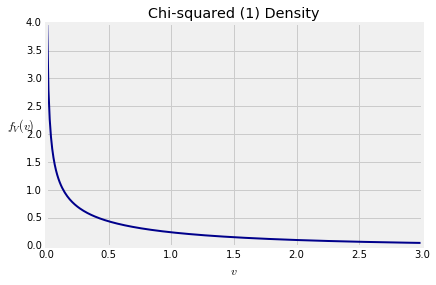

In [16]:
v = np.arange(0, 3, 0.01)
y = stats.chi2.pdf(v, 1)    # The second argument is the degrees of freedom.
plt.plot(v, y, color='darkblue', lw=2)
plt.xlabel('$v$')
plt.ylabel('$f_V(v)$', rotation=0)
plt.title('Chi-squared (1) Density');

### Chi-Squared with $n$ Degrees of Freedom ###
For a positive integer $n$, the random variable $X$ has the *chi-squared distribution with $n$ degrees of freedom* if the distribution of $X$ is gamma $(n/2, 1/2)$. That is, $X$ has density

$$
f_X(x) ~ = ~ \frac{\frac{1}{2}^{\frac{n}{2}}}{\Gamma(\frac{n}{2})} x^{\frac{n}{2} - 1} e^{-\frac{1}{2}x}, ~~~~ x > 0
$$

Here are the graphs of the chi-squared densities for degrees of freedom 2 through 5.

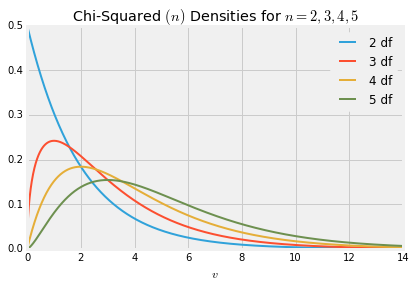

In [17]:
# HIDDEN
x = np.arange(0, 14, 0.01)
y2 = stats.chi2.pdf(x, 2)
y3 = stats.chi2.pdf(x, 3)
y4 = stats.chi2.pdf(x, 4)
y5 = stats.chi2.pdf(x, 5)
plt.plot(x, y2, lw=2, label='2 df')
plt.plot(x, y3, lw=2, label='3 df')
plt.plot(x, y4, lw=2, label='4 df')
plt.plot(x, y5, lw=2, label='5 df')
plt.legend()
plt.xlabel('$v$')
plt.title('Chi-Squared $(n)$ Densities for $n = 2, 3, 4, 5$');

Take a look at the graph of the chi-squared density wih 2 degrees of freedom. If you think it looks like the exponential $(1/2)$ density, you are right. We'll see why in the next section. For now, let's check that the mean and variance works out correctly.

### Mean and Variance of the Chi-Squared Distribution ###
You showed in exercises that if $T$ has the gamma $(r, \lambda)$ density then 

$$
E(T) ~ = ~ \frac{r}{\lambda} ~~~~~~~~~~~~ SD(T) = \frac{\sqrt{r}}{\lambda}
$$

If $X$ has the chi-squared $(n)$ distribution then $X$ is gamma $(n/2, 1/2)$. So

$$
E(X) ~ = ~ \frac{n/2}{1/2} ~ = ~ n
$$

Thus **the expectation of a chi-squared random variable is its degrees of freedom**.

The SD is
$$
SD(X) ~ = ~ \frac{\sqrt{n/2}}{1/2} ~ = ~ \sqrt{2n}
$$

We have guessed that the chi-squared $(2)$ distribution is the same as exponential $(1/2)$. By the formulas above and those we already know for the exponential, the expectations and SDs of the two distributions agree, and all four values are equal to 2.

The next section explains how the all chi-squared distributions are related to each other and to the standard normal distribution.